In [4]:
%pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:\\Users\\Shree\\Desktop\\mini project\\stock price\\TSLA.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df.shape
df.info

<bound method DataFrame.info of             Date         Open         High         Low        Close   
0     2010-06-29     3.800000     5.000000    3.508000     4.778000  \
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  410940

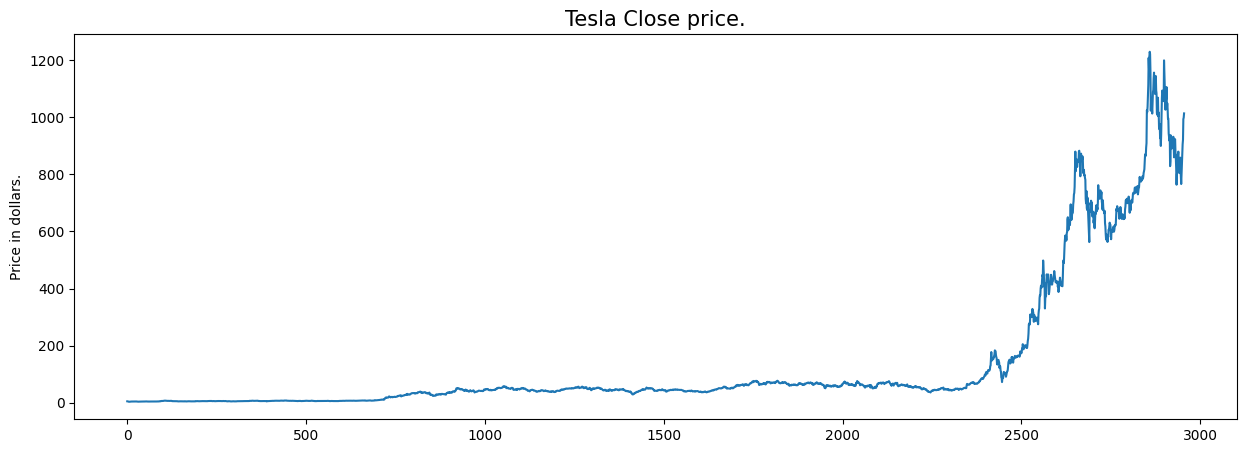

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [7]:
df = df.drop(['Adj Close'] ,axis=1)

In [8]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

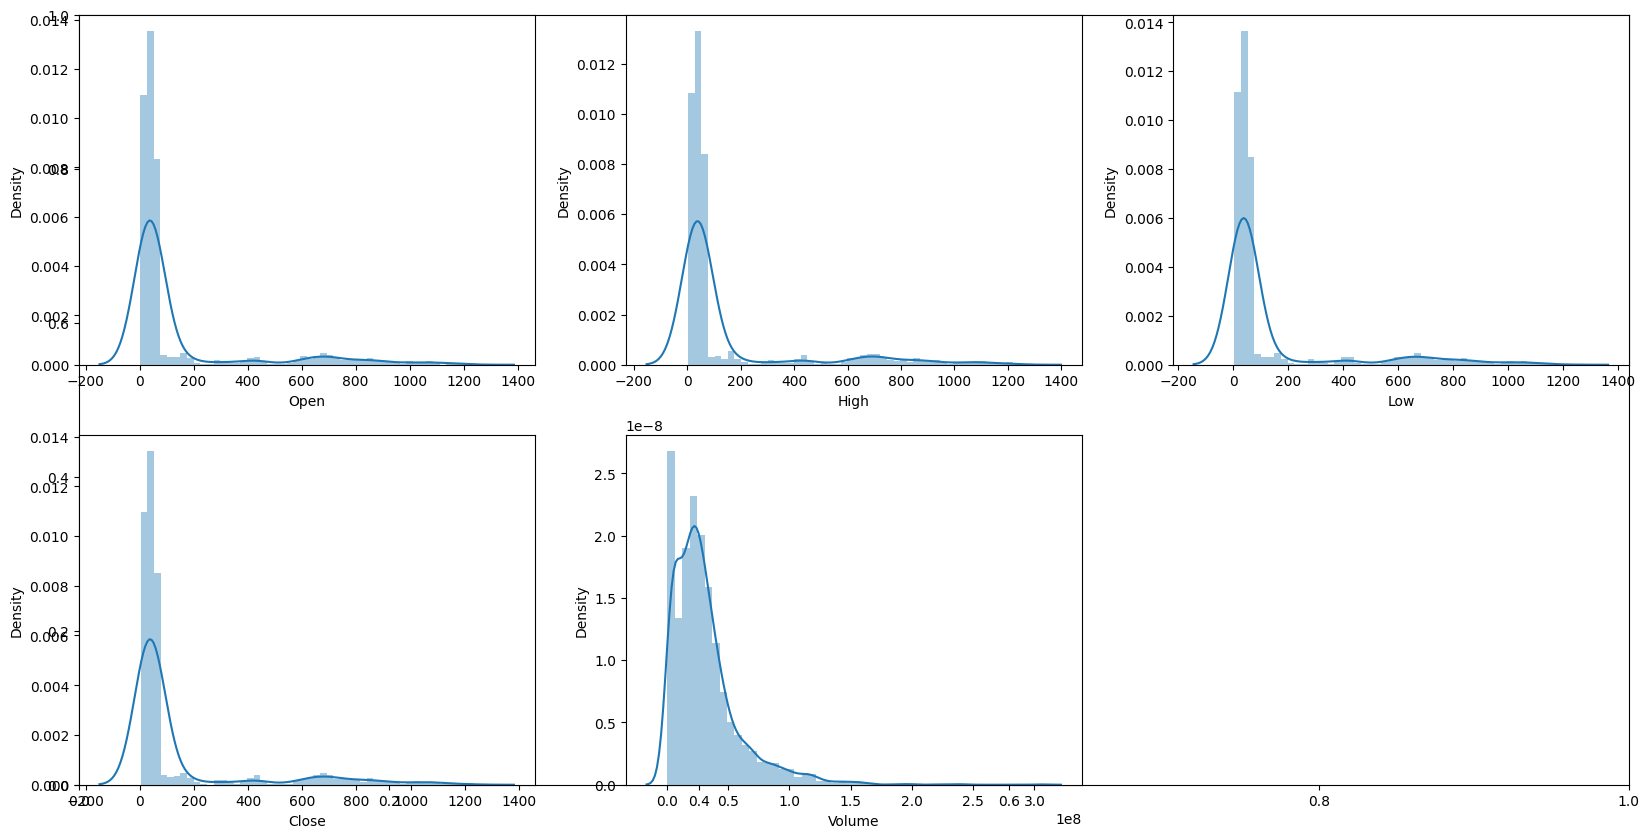

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


In [9]:
import pandas as pd

# Ensure Date column is a string before processing
df['Date'] = df['Date'].astype(str)

# Convert Date column to datetime automatically
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year, month, and day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

print(df.head())  # Verify output


        Date   Open   High    Low  Close    Volume  year  month  day
0 2010-06-29  3.800  5.000  3.508  4.778  93831500  2010      6   29
1 2010-06-30  5.158  6.084  4.660  4.766  85935500  2010      6   30
2 2010-07-01  5.000  5.184  4.054  4.392  41094000  2010      7    1
3 2010-07-02  4.600  4.620  3.742  3.840  25699000  2010      7    2
4 2010-07-06  4.000  4.000  3.166  3.222  34334500  2010      7    6


In [10]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,2010,6,29,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,2010,6,30,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,2010,7,1,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2010,7,2,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,2010,7,6,0


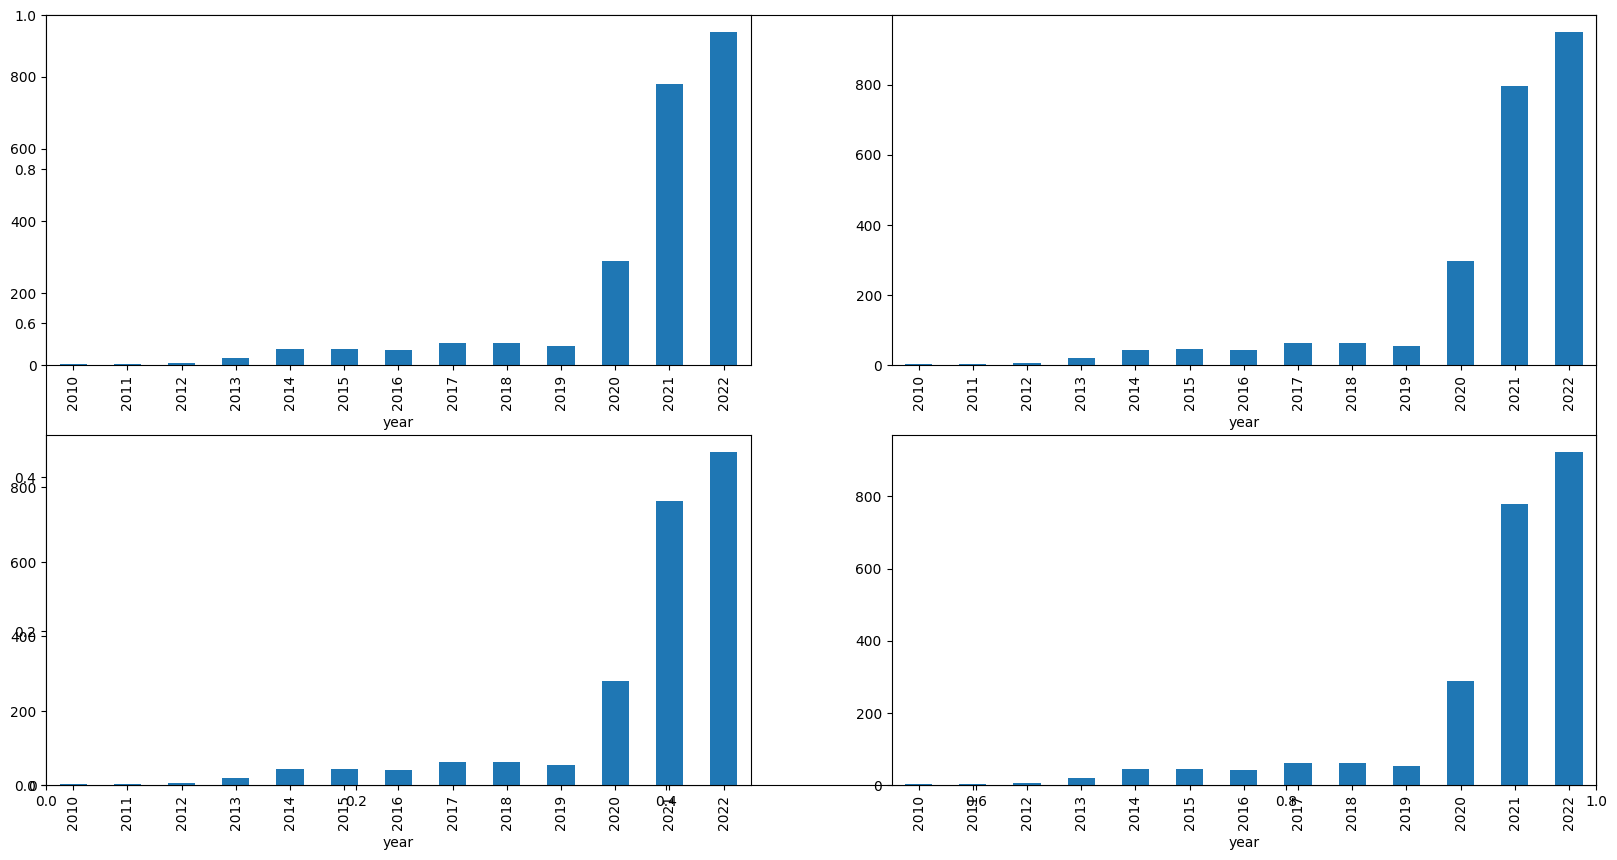

In [ ]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()




In [11]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07,2015.855833,6.124300,15.701987
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07,2015.852971,7.489426,15.736153


In [12]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


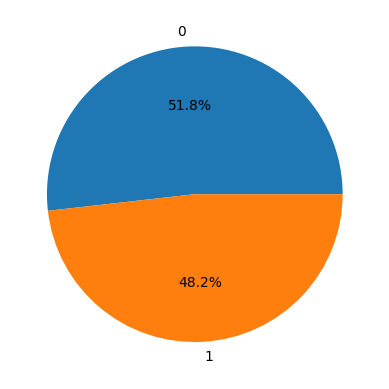

In [13]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [14]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2660, 3) (296, 3)


In [16]:
# Train models
logistic_model = LogisticRegression()
svm_model = SVC(kernel='poly', probability=True)
xgb_model = XGBClassifier()

# Fit models on training data
logistic_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)
xgb_model.fit(X_train, Y_train)

# Save trained models
joblib.dump(logistic_model, "logistic_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")

print("Models trained and saved successfully!")


Models trained and saved successfully!
